In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from IPython.display import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

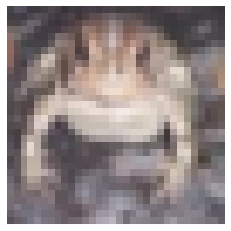

In [3]:
x = x_train[12000]
plt.axis('off')
plt.imshow(x)

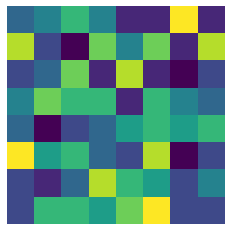

In [4]:
y = np.random.choice(np.arange(0, 1, 0.1), (8, 8, 1))[:, :, 0]
plt.axis('off')
plt.imshow(y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


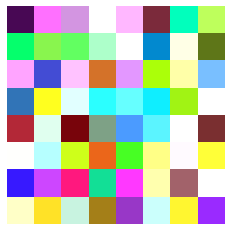

In [5]:
n = 6 ** 0.5
strides = (4, 4)
bias = np.random.uniform(0, n / 16, (8, 8, 3))
plt.axis('off')
plt.imshow(bias * 10)

[[[[2.50203414e-03 1.27166412e-02 3.69002402e-03]
   [8.74984309e-03 1.10964635e-02 7.58856822e-04]
   [1.42951093e-02 1.25141672e-02 2.87536465e-03]
   [7.03445983e-03 1.03111256e-02 1.41684454e-03]]

  [[4.78918535e-03 1.00012229e-02 9.40164979e-03]
   [8.39499279e-03 1.79651720e-03 1.48161955e-02]
   [3.74459253e-03 7.13276675e-03 3.94831095e-03]
   [7.00699750e-03 3.87863686e-03 1.57659444e-02]]

  [[7.35878057e-03 1.24971753e-02 3.70656345e-03]
   [9.09363351e-03 5.10360709e-03 9.77429132e-03]
   [1.42699265e-03 1.69457299e-02 9.76661016e-04]
   [1.36762898e-02 1.49732752e-02 1.50168822e-02]]

  [[8.79571071e-03 1.43233503e-03 5.34213951e-03]
   [8.21320217e-03 5.83777652e-03 6.10456315e-03]
   [2.94038708e-03 9.44185506e-03 1.05658177e-02]
   [5.24382628e-03 3.94684495e-03 1.47416857e-02]]]


 [[[8.25648367e-04 9.39205599e-03 8.91754279e-03]
   [4.49565480e-03 3.40219988e-03 1.46225593e-02]
   [5.70539034e-03 9.34649838e-03 1.11456283e-02]
   [1.25979849e-02 1.51081789e-02 1.3015

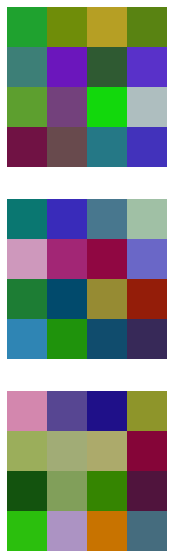

In [6]:
filters = np.random.uniform(0, n / 144, (3, 4, 4, 3))
print(filters)
fig = plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.axis('off')
    plt.imshow(filters[i] * 50)
plt.show()

In [7]:
v = np.zeros((8, 8, 3))
for i in range(4):
    for j in range(4):
        for k in range(3):
            v[i, j, k] = np.sum(filters[k] * x[4 * i:4 * (i + 1), 4 * j:4 * (j + 1)])
v += bias

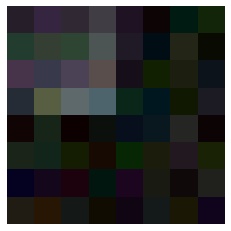

In [8]:
plt.axis('off')
plt.imshow(v)

### CNN forward and backward pass

In [9]:
def cnnforward(x, filters, bias, strides):
    filters_dim, output_dim = np.shape(filters), np.shape(bias)
    z = np.zeros(output_dim)
    for i in range(output_dim[0]):
        r_, _r = strides[0] * i, strides[0] * i + filters_dim[1]
        for j in range(output_dim[1]):
            z[i, j] = [np.sum(fltr * x[r_:_r, strides[1] * j:strides[1] * j + filters_dim[2]]) for fltr in filters]
    return z + bias

In [10]:
def cnnbackward(x, filters, error, strides):
    filters_dim, output_dim, input_dim = np.shape(filters), np.shape(error), np.shape(x)
    filters_grad, x_grad = np.zeros(filters_dim), np.zeros(input_dim)
    for i in range(output_dim[0]):
        r_, _r = strides[0] * i, strides[0] * i + filters_dim[1]
        for j in range(output_dim[1]):
            c_, _c = strides[1] * j, strides[1] * j + filters_dim[2]
            filters_grad += [err * x[r_:_r, c_:_c] for err in error[i, j]]
            x_grad[r_:_r, c_:_c] = np.sum([err * fltr for err, fltr in zip(error[i, j], filters)], 0)
    return filters_grad, x_grad

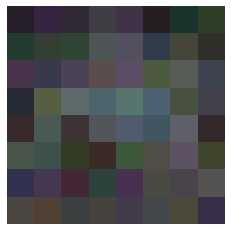

In [11]:
output = cnnforward(x, filters, bias, strides)
plt.axis('off')
plt.imshow(output)

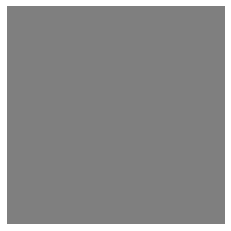

In [12]:
y = np.ones((8, 8, 3)) * 0.5
plt.axis('off')
plt.imshow(y)

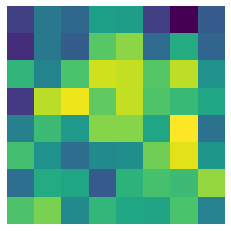

In [13]:
error = output - y
plt.axis('off')
plt.imshow(error[:, :, 0])

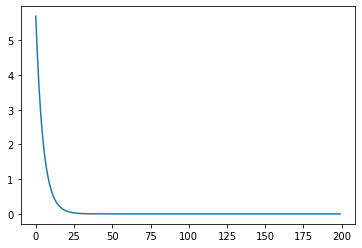

In [14]:
# altering biases only
losses = []
for i in range(200):
    output = cnnforward(x, filters, bias, strides)
    error = output - y
    bias -= 1e-1 * error
    losses.append(0.5 * np.sum(error ** 2))
plt.plot(losses)

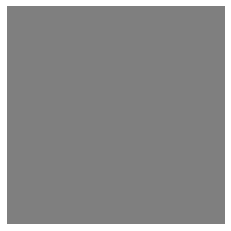

In [15]:
output = cnnforward(x, filters, bias, strides)
plt.axis('off')
plt.imshow(output)

In [16]:
x, y = x_train[1000], np.ones((2, 2, 1)) * 0.5
strides = (16, 16)
bias = np.random.uniform(-1e-3, 1e-3, (2, 2, 1))
filters = np.random.uniform(-1e-3, 1e-3, (1, 16, 16, 3))

In [17]:
y

array([[[0.5],
        [0.5]],

       [[0.5],
        [0.5]]])

In [18]:
losses = []
for i in range(100):
    output = cnnforward(x, filters, bias, strides)
    error = output - y
    bias -= 1e-3 * error
    filters_grad, x_grad = cnnbackward(x, filters, error, strides) 
    filters -= 1e-3 * filters_grad 
    losses.append(0.5 * np.sum(error ** 2))

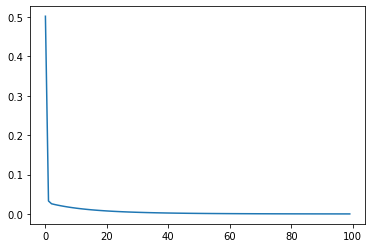

In [19]:
plt.plot(losses)

In [20]:
output = cnnforward(x, filters, bias, strides)
output

array([[[0.49361416],
        [0.5114092 ]],

       [[0.49128929],
        [0.49794828]]])

### Max pooling forward and backward pass

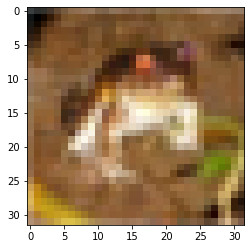

In [21]:
x = x_train[0]
plt.imshow(x)

In [22]:
for i in range(3):
    print(np.max(x[30:32, 30:32, i]))

0.592156862745098
0.4627450980392157
0.32941176470588235


In [23]:
s = time.time()
z = np.zeros((16, 16, 3))
for i in range(16):
    r_, _r = i * 2, i * 2 + 2
    for j in range(16):
        c_, _c = j * 2, j * 2 + 2
        z[i, j] = [np.max(x[r_:_r, c_:_c, k]) for k in range(3)]
e = time.time()
e - s

0.016987323760986328

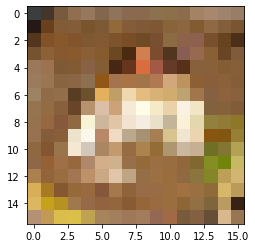

In [24]:
plt.imshow(z)

In [25]:
def poolforward(x, pool_size, strides):
    input_dim = np.shape(x)
    output_dim = (int((input_dim[0] - pool_size[0]) / strides[0] + 1), int((input_dim[1] - pool_size[1]) / strides[1] + 1), input_dim[2])
    z, indices = np.zeros(output_dim), np.zeros(output_dim)
    for i in range(output_dim[0]):
        r_, _r = strides[0] * i, strides[0] * i + pool_size[0]
        for j in range(output_dim[1]):
            c_, _c = strides[1] * j, strides[1] * j + pool_size[1]
            fmaps = [x[r_:_r, c_:_c, k] for k in range(output_dim[2])] 
            indices_ij = [np.argmax(fmap) for fmap in fmaps]
            indices[i, j] = indices_ij
            z[i, j] = [x[r_ + int(indices_ij[k] // pool_size[1]), c_ + int(indices_ij[k] % pool_size[0]), k] for k in range(output_dim[2])]
    return z, indices

In [26]:
pool_size, strides = (2, 2), (2, 2)

In [27]:
s = time.time()
z, indices = poolforward(x, pool_size, strides)
e = time.time()
e - s

0.012090921401977539

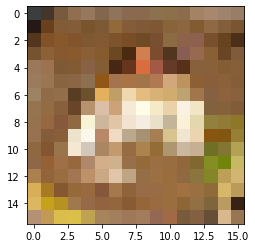

In [28]:
plt.imshow(z)

In [29]:
indices[0, 2, 0], indices[0, 2, 1], indices[0, 2, 2]

(3.0, 1.0, 1.0)

In [30]:
for i in range(10):
    for j in range(10):
        print(indices[i, j], end=' ')
    print('\n')

[0. 0. 0.] [1. 1. 0.] [3. 1. 1.] [1. 1. 1.] [0. 1. 1.] [0. 0. 0.] [1. 0. 0.] [0. 0. 0.] [0. 0. 0.] [1. 1. 1.] 

[3. 2. 0.] [3. 3. 3.] [1. 1. 1.] [0. 0. 0.] [3. 3. 3.] [2. 2. 2.] [3. 3. 3.] [2. 1. 1.] [0. 0. 0.] [2. 2. 2.] 

[3. 3. 2.] [3. 3. 1.] [2. 2. 2.] [2. 2. 2.] [1. 1. 1.] [0. 0. 0.] [1. 1. 1.] [0. 0. 0.] [1. 1. 1.] [1. 0. 0.] 

[3. 2. 2.] [3. 3. 3.] [0. 0. 2.] [2. 2. 2.] [1. 1. 1.] [2. 2. 2.] [0. 0. 0.] [1. 0. 0.] [3. 3. 3.] [2. 2. 2.] 

[2. 2. 2.] [2. 2. 2.] [3. 2. 2.] [1. 3. 3.] [1. 1. 3.] [0. 0. 0.] [3. 3. 3.] [3. 3. 2.] [1. 1. 1.] [0. 0. 0.] 

[1. 0. 0.] [0. 0. 0.] [1. 0. 1.] [0. 0. 0.] [0. 0. 0.] [3. 3. 3.] [3. 3. 3.] [2. 2. 2.] [2. 2. 2.] [2. 2. 2.] 

[2. 2. 2.] [1. 2. 2.] [0. 0. 0.] [1. 1. 0.] [0. 0. 0.] [3. 3. 3.] [1. 3. 3.] [2. 2. 2.] [2. 2. 2.] [3. 2. 0.] 

[1. 2. 0.] [0. 0. 0.] [0. 2. 0.] [1. 1. 1.] [3. 3. 3.] [2. 2. 2.] [3. 1. 1.] [3. 3. 3.] [2. 2. 2.] [2. 2. 2.] 

[0. 0. 0.] [1. 3. 3.] [2. 2. 2.] [3. 3. 3.] [3. 3. 3.] [0. 0. 0.] [3. 3. 3.] [1. 1. 1.] [0. 0. 0.] [0. 0

In [31]:
def poolbackward(error, amxs, strides):
    input_dim = np.shape(error)
    output_dim = ((input_dim[0] - 1) * strides[0] + pool_size[0], (input_dim[1] - 1) * strides[1] + pool_size[1], input_dim[2])
    x_grad = np.zeros(output_dim)
    for i in range(input_dim[0]):
        r = strides[0] * i
        for j in range(input_dim[1]):
            c = strides[1] * j
            argmaxes = amxs[i, j]
            indices_ij = [[r + int(amx // pool_size[1]), c + int(amx % pool_size[0])] for amx in argmaxes]
            for k in range(input_dim[2]):
                x_grad[indices_ij[k][0], indices_ij[k][1], k] = error[i, j, k]
    return x_grad

In [32]:
s = time.time()
x_grad = poolbackward(z, indices, strides)
e = time.time()
e - s

0.005013227462768555

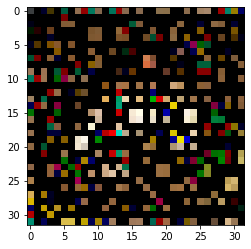

In [33]:
plt.imshow(x_grad)

In [34]:
def relu(x): 
    return np.maximum(x, 0)


def sigmoid(x): 
    return 1 / (1 + np.exp(-x))


def softmax(x): 
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

In [35]:
filters1 = np.random.normal(0, (2 / (32 * 32 * 3 + 8 * 8 * 3)) ** 0.5, (3, 4, 4, 3))
bias1 = np.random.normal(0, (2 / 8 * 8 * 3) ** 0.5, (8, 8, 3))
strides1 = (4, 4)
pool_size1, strides2 = (2, 2), (2, 2)
w = np.random.uniform(-(6 / 26) ** 0.5, (6 / 26) ** 0.5, (10, 192))
b = np.random.uniform(-(6 / 26) ** 0.5, (6 / 26) ** 0.5, (10))

In [36]:
def forward(x):
    L = [x]
    L.append(relu(cnnforward(L[-1], filters1, bias1, strides1)))
    L.append(L[-1].ravel())
    L.append(softmax(np.dot(w, L[-1]) + b))
    return L

In [37]:
s = time.time()
print(forward(x)[-1])
e = time.time()
e - s

[8.72574639e-03 1.96928649e-04 3.95132128e-02 3.03759453e-10
 6.91041051e-01 3.04557265e-10 2.07357313e-05 4.21873131e-07
 2.60501682e-01 2.20785483e-07]


0.004183292388916016

In [38]:
ct = 0
s = time.time()
for i in range(50):
    ct += np.argmax(y_train[i]) == np.argmax(forward(x_train[i])[-1])
e = time.time()

print('accuracy', 100 * ct / 50, '%')
e - s

accuracy 10.0 %


0.1955244541168213

In [39]:
filters1_grad = np.zeros(np.shape(filters1))
bias1_grad = np.zeros(np.shape(bias1))
w_grad = np.zeros(np.shape(w))
b_grad = np.zeros(np.shape(b))

In [40]:
def backward(error, L):
    b_grad = error
    w_grad = np.outer(error, L[-2])
    error = np.reshape(np.dot(np.transpose(w), error), (8, 8, 3)) # poolbackward(np.reshape(np.dot(np.transpose(w), error), (4, 4, 3)), L[-3][1], strides2) > 0
    bias1_grad = error
    filters1_grad, x_grad = cnnbackward(L[0], filters1, error, strides1)
    return b_grad, w_grad, bias1_grad, filters1_grad

In [41]:
L = forward(x_train[100])
error = L[-1] - y_train[100]
error

array([ 6.63020215e-03,  1.47107936e-04,  2.99902593e-02,  2.61168929e-10,
        7.44095305e-01,  2.63719727e-10,  1.50838788e-05,  3.72810282e-07,
       -7.80878540e-01,  2.08759867e-07])

In [42]:
b_grad, w_grad, bias1_grad, filters1_grad = backward(error, L)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b_grad - [ 6.63020215e-03  1.47107936e-04  2.99902593e-02  2.61168929e-10
  7.44095305e-01  2.63719727e-10  1.50838788e-05  3.72810282e-07
 -7.80878540e-01  2.08759867e-07] 



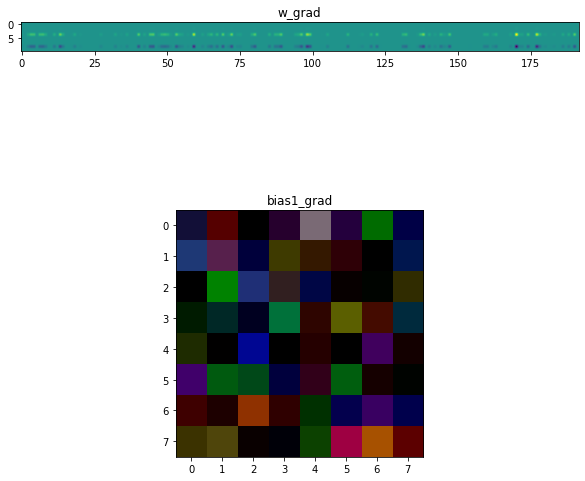

In [43]:
print('b_grad -', b_grad, '\n')
fig = plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('w_grad')
plt.imshow(w_grad)
plt.subplot(2, 1, 2)
plt.title('bias1_grad')
plt.imshow(bias1_grad.astype('float64'))
plt.show()

In [44]:
losses = []
for _ in range(2):
    L = forward(x_train[100])
    error = L[-1] - y_train[100]
    b_grad, w_grad, bias1_grad, filters1_grad = backward(error, L)
    b -= 1e-2 * b_grad
    w -= 1e-2 * w_grad
    bias1 -= 1e-2 * bias1_grad
    filters1 -= 1e-2 * filters1_grad
    losses.append(0.5 * np.sum(error) ** 2)

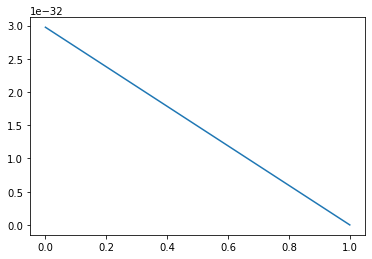

In [45]:
plt.plot(losses)

In [46]:
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [47]:
forward(x_train[100])[-1]

array([3.23347099e-21, 1.50843249e-20, 4.92864472e-20, 1.79461258e-30,
       1.66798514e-41, 6.81913017e-28, 5.21751375e-29, 4.23747741e-28,
       1.00000000e+00, 1.71528872e-26])